<a href="https://colab.research.google.com/github/misrapk/Deep-Learning-Course-YT/blob/main/Data_Augumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers

In [3]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [4]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


Text(0.5, 1.0, 'tulips')

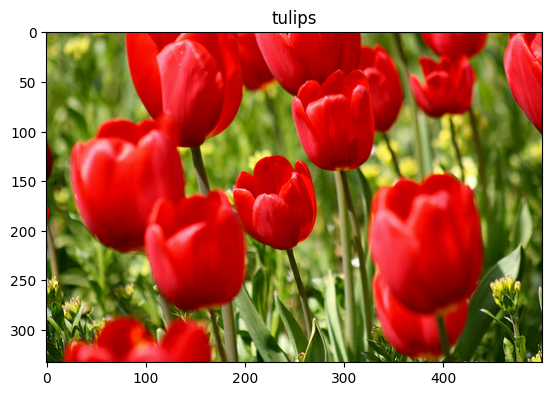

In [5]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
plt.imshow(image)
plt.title(get_label_name(label))

In [10]:
image

<tf.Tensor: shape=(333, 500, 3), dtype=uint8, numpy=
array([[[ 93, 122,  30],
        [ 90, 118,  31],
        [ 88, 118,  28],
        ...,
        [247,  77,  78],
        [253,  87,  87],
        [255,  76,  75]],

       [[ 98, 125,  30],
        [ 95, 124,  32],
        [ 96, 125,  32],
        ...,
        [247,  81,  83],
        [250,  86,  84],
        [252,  71,  64]],

       [[ 98, 126,  26],
        [101, 128,  31],
        [106, 132,  33],
        ...,
        [254,  81,  85],
        [254,  79,  76],
        [252,  55,  47]],

       ...,

       [[ 35,  51,   6],
        [ 21,  49,   0],
        [ 30,  57,   6],
        ...,
        [224, 239,  78],
        [192, 208,  50],
        [ 88,  54,  53]],

       [[ 65,  73,  32],
        [ 20,  46,   0],
        [ 22,  48,   0],
        ...,
        [230, 236,  74],
        [230, 246,  62],
        [ 88,  57,  36]],

       [[ 95,  97,  60],
        [ 15,  41,   0],
        [ 23,  51,   3],
        ...,
        [210, 224,  4

## Preprocessign Layers

In [7]:
IMG_SIZE = 180

resize_nd_rescale = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE),
    layers.Rescaling(1./255)
])

In [8]:
resize_nd_rescale.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing_1 (Resizing)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

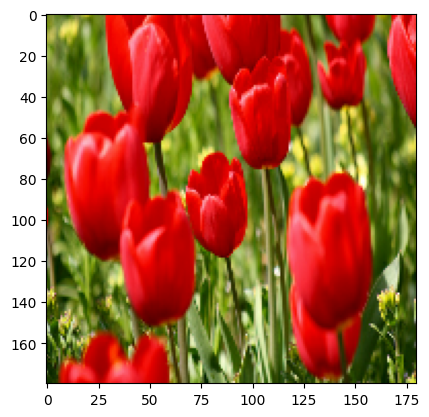

In [11]:
resize_img = resize_nd_rescale(image)
plt.imshow(resize_img)

In [12]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [13]:
data_augmentation

<Sequential name=sequential_2, built=False>

In [14]:
# Add the image to a batch.
image = tf.cast(tf.expand_dims(image, 0), tf.float32)

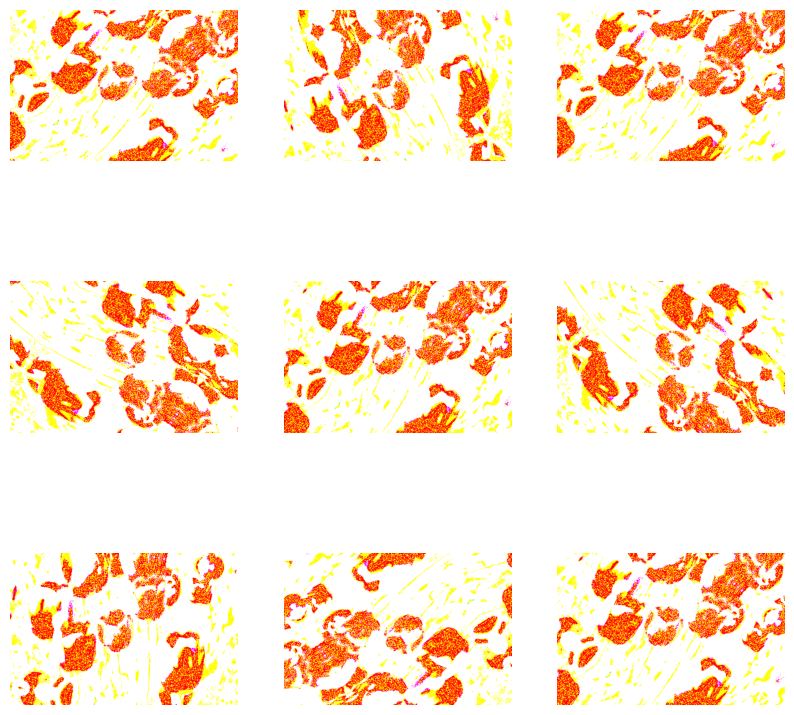

In [17]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

**other things for augmentation**

tf.keras.layers.RandomContrast, tf.keras.layers.RandomCrop, tf.keras.layers.RandomZoom

# Custom data augmentation

In [18]:
def random_invert_img(x, p=0.5):
  if  tf.random.uniform([]) < p:
    x = (255-x)
  else:
    x
  return x

In [19]:
def random_invert(factor=0.5):
  return layers.Lambda(lambda x: random_invert_img(x, factor))

random_invert = random_invert()

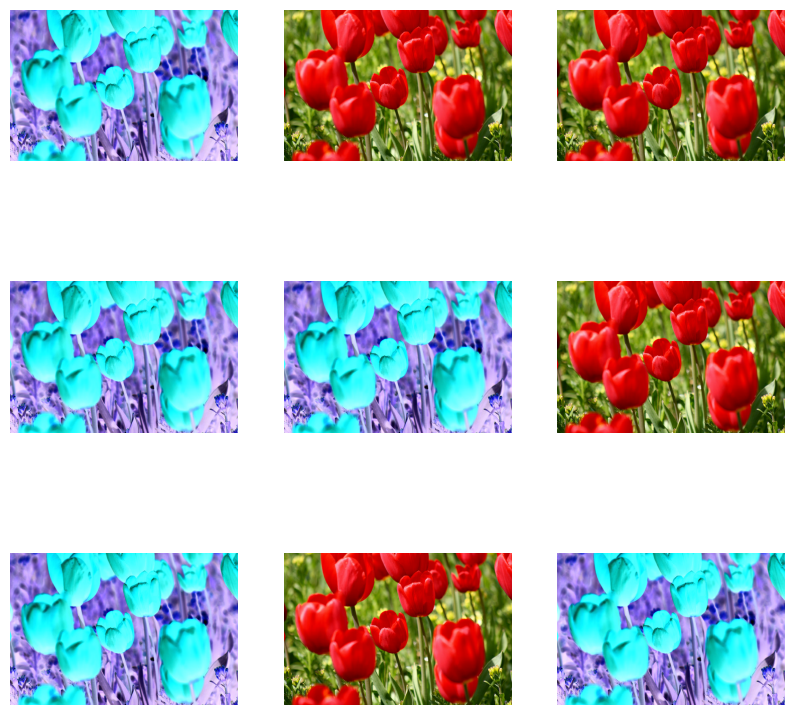

In [20]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = random_invert(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

Text(0.5, 1.0, 'tulips')

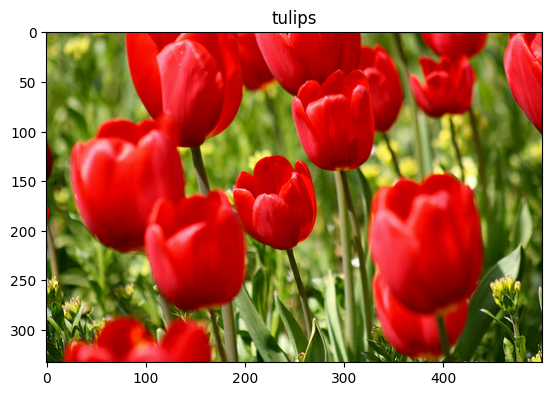

In [30]:

image, label = next(iter(train_ds))
plt.imshow(image)
plt.title(get_label_name(label))

In [28]:
# prompt: write a function to visualise original and augmented images with paramters as original_img, aug_img. the function should plot both images side by side

def plot_images(original_img, augmented):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(augmented)
    plt.title("Augmented Image")
    plt.axis("off")
    plt.show()



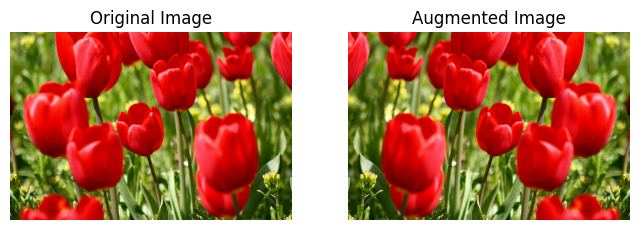

In [32]:
# flip
aug_image = tf.image.flip_left_right(image)
plot_images(image, aug_image)

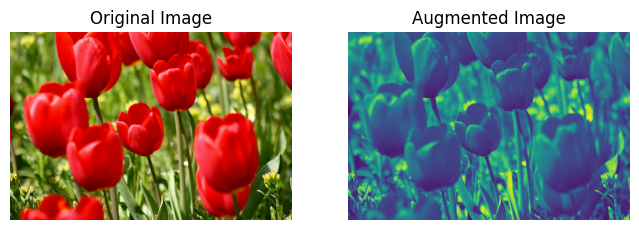

In [34]:
# grayscale

grayscaled = tf.image.rgb_to_grayscale(image)
plot_images(image, grayscaled)

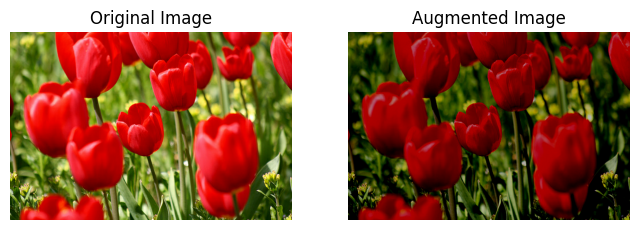

In [49]:
bright = tf.image.adjust_brightness(image, -0.3)
plot_images(image,bright )

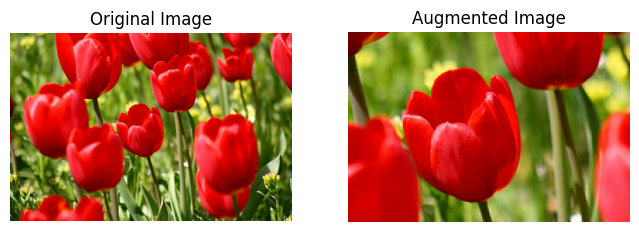

In [54]:
plot_images(image,tf.image.central_crop(image, central_fraction=0.4) )

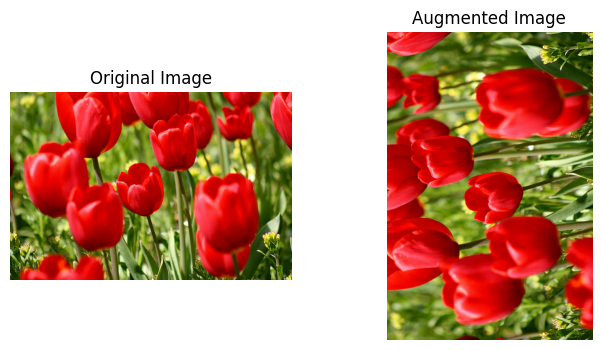

In [56]:
plot_images(image,tf.image.rot90(image) )  #rotate

# Random changes

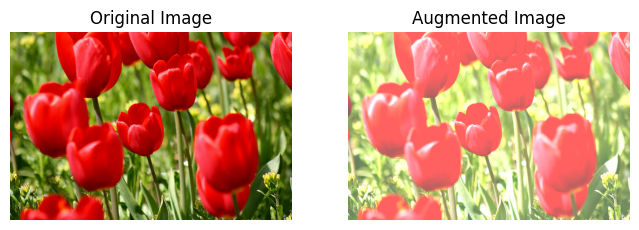

In [61]:
#random brightness


plot_images(image,tf.image.stateless_random_brightness(image, 0.5, (1,0)))  #rotate


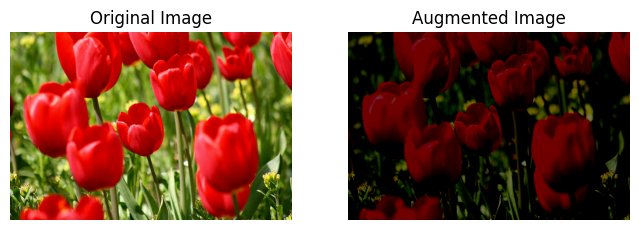

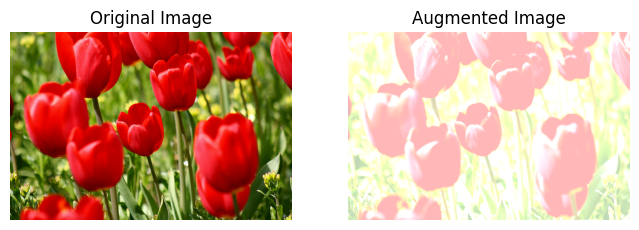

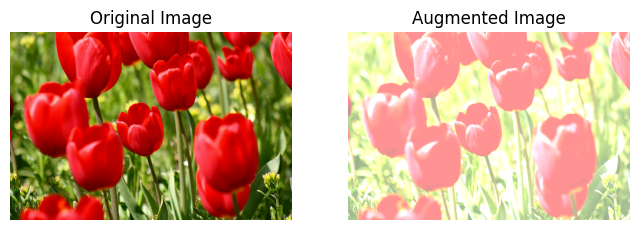

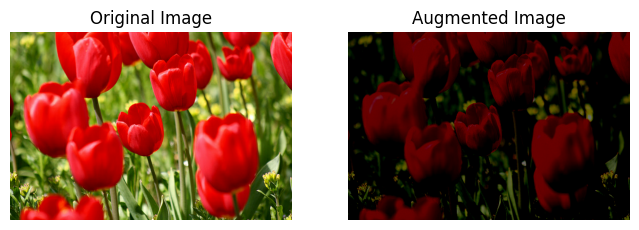

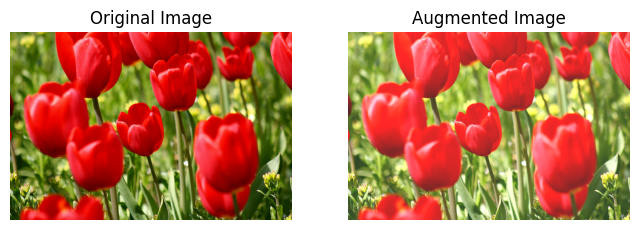

In [62]:
for i in range(5):
  seed = (i,0)
  plot_images(image, tf.image.stateless_random_brightness(image, max_delta=0.95, seed=seed))

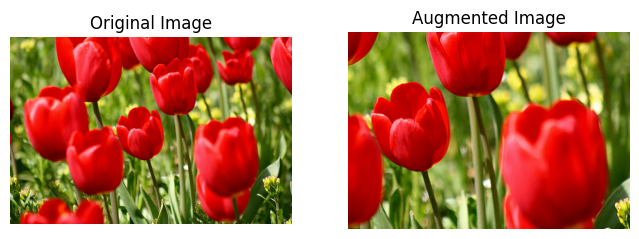

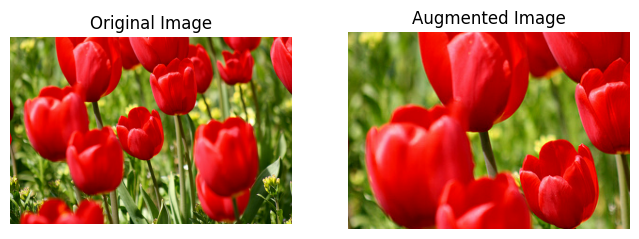

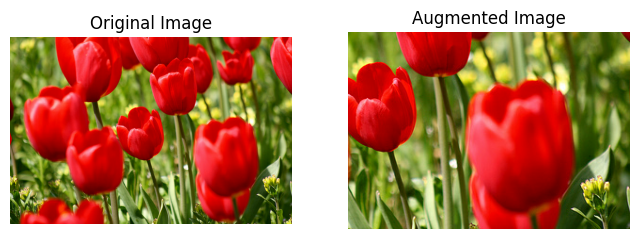

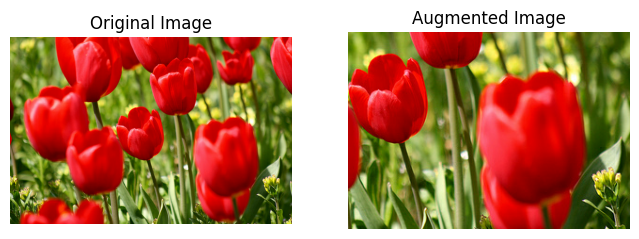

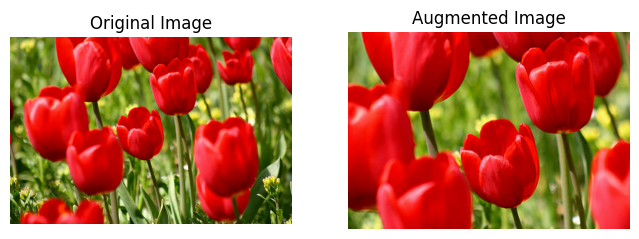

In [63]:
# for ranodm crop

for i in range(5):
  seed = (i,0)
  plot_images(image, tf.image.stateless_random_crop(
    image, size=[210,300,3], seed=seed,))